## Machine Learning to Predict Heart Disease
This notebook explores various python libraries to predict heart disease in patients. 

1. Problem Statement:
Can we predict whether a patient has heart disease based on clinical parameters? 

2. Data:
Taken from Kaggle at https://www.kaggle.com/ronitf/heart-disease-uci

3. Evaluation:
Looking to achieve at least 95% accuracy in predicting whether a patient has heart disease or not. Which library provides the best accuracy with this data?

4. Features:
The dataset includes 14 total columns, giving us 13 features to train on. These features are outlined here for ease of reference.

<b>1. age</b>- age in years<br>
<b>2. sex</b> - 1 = male, 0 = female<br>
<b>3. cp</b> - chest pain type<br>
0: Typical angina: chest pain related decrease blood supply to the heart<br>
1: Atypical angina: chest pain not related to heart<br>
2: Non-anginal pain: typically esophageal spasms (non heart related)<br>
3: Asymptomatic: chest pain not showing signs of disease<br>
<b>4. trestbps</b> - resting blood pressure (in mm Hg on admission to the hospital) 130-140+ is usually cause for concern<br>
<b>5. chol</b> - serum cholestoral in mg/dl<br>
serum = LDL + HDL + .2 * triglycerides; above 200 is cause for concern<br>
<b>6. fbs</b> - fasting blood sugar > 120 mg/dl<br> 
1 = true; 0 = false<br>
'>126' mg/dL signals diabetes<br>
<b>7. restecg</b> - resting electrocardiographic results<br>
0: Nothing to note<br>
1: ST-T Wave abnormality: 
can range from mild symptoms to severe problems
signals non-normal heart beat<br>
2: Possible or definite left ventricular hypertrophy: 
Enlarged heart's main pumping chamber<br>
<b>8. thalach</b> - maximum heart rate achieved<br>
<b>9. exang</b> - exercise induced angina; 1 = yes; 0 = no<br>
<b>10. oldpeak</b> - ST depression induced by exercise relative to rest looks at stress of heart during excercise. Unhealthy heart will stress more<br>
<b>11. slope</b> - the slope of the peak exercise ST segment<br>
0: Upsloping: better heart rate with excercise (uncommon)<br>
1: Flatsloping: minimal change (typical healthy heart)<br>
2: Downslopins: signs of unhealthy heart<br>
<b>12. ca</b> - number of major vessels (0-3) colored by flourosopy<br>
colored vessel means the doctor can see the blood passing through; the more blood movement the better (no clots)<br>
<b>13. thal</b> - thalium stress result<br>
1,3: normal<br>
6: fixed defect: used to be defect but ok now<br>
7: reversable defect: no proper blood movement when excercising<br>

5. Target: 
<b>target</b> - have disease or not; 1=yes, 0=no

# 1.0 Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('heart-disease.csv')

## 1.1 Exploratory Data Analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Just looking at the data initially, we see 303 examples, with 165 having heart disease and 138 without heart disease. This is a fairly balanced distribution, which should allow us a good way to train our model. One note of concern right away is that 303 examples is rather small for building a model where we want a high level of accuracy. 

Further, the data seems to be already optimized for machien learning, with all the features in numerical format, no missing values, and well-labeled features and target variables. 

In [7]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


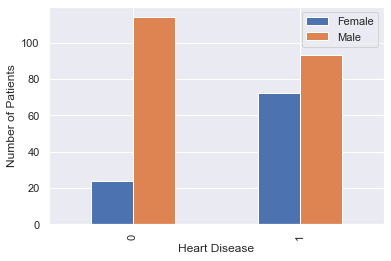

In [9]:
sns.set()
pd.crosstab(df['target'], df['sex']).plot(kind='bar')
plt.legend(['Female', 'Male'])
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients');

This further amplifies my concern over the small amount of data. Specifically, it looks like 72 of 96 female patients tested positive for heart disease. While we will proceed with the available data, I would prefer to have additional female patients in this sample to build a more accurate model in the real world. 